## Escuela Politécnica Nacional
## Métodos Numéricos
## Integrantes: 
### - Jhonn Saeteros
### - Christian Ayala

# Grafique la trayectoria de los siguientes sistemas de ecuaciones

# 1) $x_1+x_2=7$
# 2) $-2x_1+5x_2=0$
# 3) $x_0=(0,0)$
# 4) $x_0=(5,2)$
# 5) $x_1+x_2=6$
# 6) $-2x_1+x_2=0$

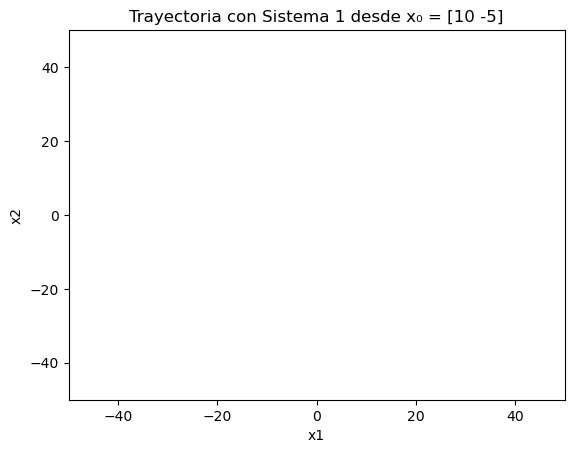

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Sistemas lineales (matrices A)
A1 = np.array([[1, 1],
               [-2, 5]])

A2 = np.array([[1, 1],
               [-2, 1]])

# Lista de sistemas a probar
sistemas = [("Sistema 1", A1), ("Sistema 2", A2)]

# Condiciones iniciales
x0_list = [np.array([0, 0]), np.array([5, 2]), np.array([10, -5])]  # Probar una que diverja

# Función para generar trayectoria
def trayectoria(A, x0, pasos=20):
    xs = [x0]
    for _ in range(pasos):
        xs.append(A @ xs[-1])
    return np.array(xs)

# Crear figura
fig, ax = plt.subplots()
colors = ['blue', 'green', 'red']
line, = ax.plot([], [], 'o-', lw=2)

def init():
    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 50)
    ax.grid()
    return line,

# Elegir sistema a mostrar (puedes cambiar a A2 si deseas)
nombre_sistema, A = sistemas[0]

# Elegir condición inicial (cambia el índice de x0_list para probar divergencia)
x0 = x0_list[2]  # Tercera opción: diverge

tray = trayectoria(A, x0, pasos=20)

def update(i):
    line.set_data(tray[:i+1, 0], tray[:i+1, 1])
    line.set_label(f'Paso {i}')
    ax.legend()
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(tray),
                              init_func=init, blit=True, interval=500, repeat=False)

plt.title(f'Trayectoria con {nombre_sistema} desde x₀ = {x0}')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
